### Use many events, you ran on one event
1000 events (both training and testing - 2k total events)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
n_bins = 100
center_bin = 50
width = 10
amplitude = 10


In [46]:
import math

def gaussian(amp, mean,sigma):
    return lambda x: amp*math.exp(-(x-mean)**2/(2*sigma**2))

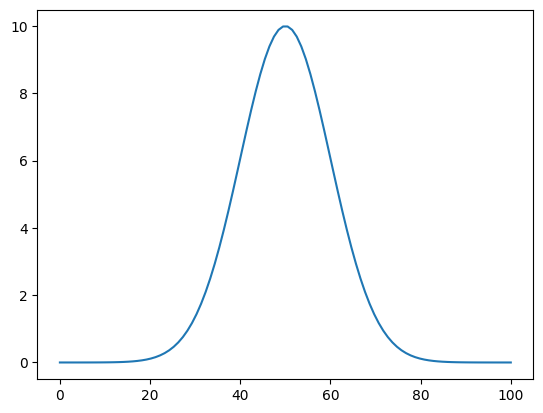

In [47]:
x=np.linspace(0,n_bins,n_bins)
y=list(map(gaussian(amplitude,center_bin,width),x))
plt.plot(x,y)

(array([  1.,   5.,  22.,  86., 202., 298., 229., 100.,  47.,  10.]),
 array([ 60. ,  67.1,  74.2,  81.3,  88.4,  95.5, 102.6, 109.7, 116.8,
        123.9, 131. ]),
 <BarContainer object of 10 artists>)

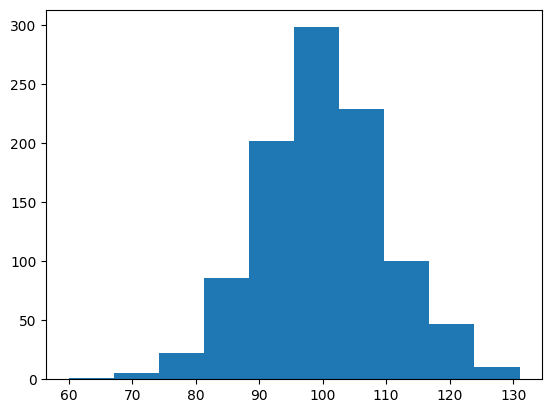

In [48]:
plt.hist(np.random.poisson(lam=100, size=1000))

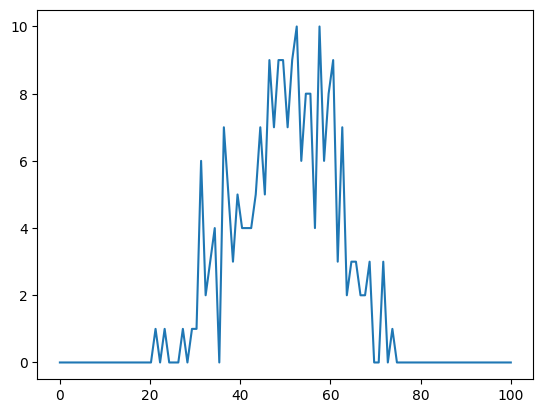

In [49]:
counts = list(map(lambda x: np.random.poisson(lam=x,size=None),y))
plt.plot(x,counts)

<ErrorbarContainer object of 3 artists>

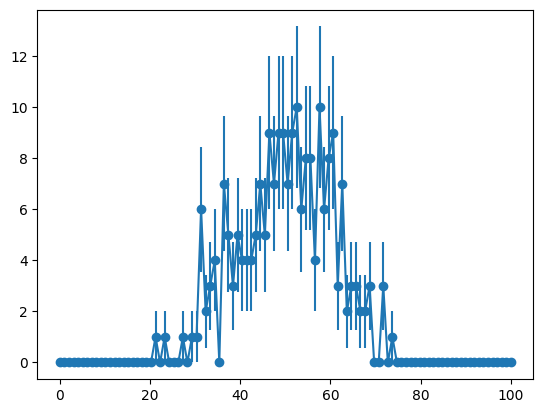

In [50]:
plt.errorbar(x, counts, np.sqrt(counts), marker='o')

In [51]:
def cluster_generator(n_bins = 100, center_bin = 50, width = 10, amplitude = 10 ):
    x=np.linspace(0,n_bins,n_bins)
    y=list(map(gaussian(amplitude,center_bin,width),x))
    counts = list(map(lambda x: np.random.poisson(lam=x,size=None),y))
    return counts

In [52]:
def cluster_event_generator(n_cells, 
                            noise, 
                            n_cluster_generator, 
                            cluster_center_generator,
                            cluster_energy_generator, 
                            cluster_width_generator, 
                            circular=True):
    cells = np.random.normal(0, noise, size= n_cells)
    for _ in range(int(n_cluster_generator())):
        cells += cluster_generator(n_cells, cluster_center_generator(), cluster_width_generator(), cluster_energy_generator())

    return cells            

In [53]:
def normal_gen(mean,sigma):
    return lambda: np.random.normal(mean,sigma,size=None)

In [54]:

n_sigma_truth=2.5

def cluster_event_generator(n_cells, 
                            noise, 
                            n_cluster_generator, 
                            cluster_center_generator,
                            cluster_energy_generator, 
                            cluster_width_generator, 
                            circular=True):
    truth = list()
    n_clusters = int(n_cluster_generator())
    clusters = np.zeros((n_clusters,n_cells))

    for i in range(n_clusters):
        truth.append([cluster_center_generator(), cluster_width_generator(), cluster_energy_generator()])
        clusters[i] = cluster_generator(n_cells, *truth[-1])

    cells = np.random.normal(0, noise, size= n_cells)
    cells += np.sum(clusters,axis=0)
    
    truthmap=-1*np.ones((n_clusters,n_cells),dtype="int")
    truth=np.array(truth)
    sorted_index=np.argsort(truth[:,2],axis=0)
    truth=truth[sorted_index]
    clusters=clusters[sorted_index]

    for i,cluster in enumerate(clusters):
        center = truth[i][0]
        width = truth[i][1]
        max_i=min(100,int(center+n_sigma_truth*width))
        min_i=max(0,int(center-n_sigma_truth*width))
        truthmap[i][min_i:max_i]=i

    
    truthmap_projection = np.max(truthmap,axis=0)

    return cells, clusters,truth, truthmap_projection

[[ 98.90831415  11.16972146 221.51984431]
 [ 96.92350095  16.98679201 225.73962624]
 [ 99.08350543  16.99173994 230.9300693 ]
 [115.02328407  17.05104066 233.54937874]
 [106.03252514  15.31461982 236.23790913]
 [ 92.68357389  12.22300323 241.22069625]
 [ 66.37443072  15.12837604 242.73274121]
 [102.60708456  15.75835935 246.82870315]
 [ 76.15213711  13.01118415 249.66744735]
 [110.952293    16.21880049 253.18567613]
 [ 90.94482231  18.42428245 259.53997634]
 [110.12759942  12.68069278 272.58158854]]


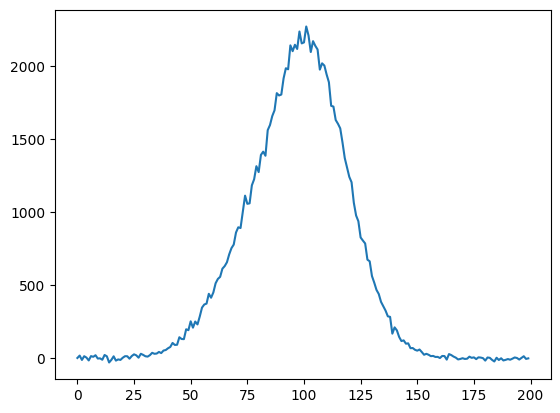

In [55]:
an_event, clusters, truth, truthmap=cluster_event_generator(200, 
                        noise = 10,
                        n_cluster_generator=normal_gen(10,3), 
                        cluster_center_generator=normal_gen(100,20),
                        cluster_energy_generator=normal_gen(250,25), 
                        cluster_width_generator=normal_gen(15,2))

plt.plot(an_event)
print(truth)

In [56]:
n_clusters = clusters.shape[0]
n_cells=200
noise = 10

truthmap=np.zeros((n_clusters,n_cells),dtype="int")
truth=np.array(truth)
sorted_index=np.argsort(truth[:,2],axis=0)
truth=truth[sorted_index]
clusters=clusters[sorted_index]

cluster_mask = clusters>.0001
for i in range(n_clusters):
    truthmap[i][cluster_mask[i]]=i

truthmap_projection = np.max(truthmap,axis=0)

truthmap_projection

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  6, 10,  0,  6,
        6,  6,  6,  6,  6,  6,  6,  6, 10,  6, 10,  6,  8, 10, 10,  8, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10,  9, 11,
        9, 10, 11, 10, 10, 11, 10,  3,  9,  9,  9,  3,  9, 10,  9,  3,  3,
        9,  0,  0,  3,  0,  3,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [57]:
truthmap=-1*np.ones((n_clusters,n_cells),dtype="int")
truth=np.array(truth)
sorted_index=np.argsort(truth[:,2],axis=0)
truth=truth[sorted_index]
clusters=clusters[sorted_index]

for i,cluster in enumerate(clusters):
    center = truth[i][0]
    width = truth[i][1]
    max_i=min(100,int(center+n_sigma_truth*width))
    min_i=max(0,int(center-n_sigma_truth*width))
    truthmap[i][min_i:max_i]=i

    
truthmap_projection = np.max(truthmap,axis=0)

truthmap_projection

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  8, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [58]:
# Standard libraries
import numpy as np
import torch

# Third-party libraries
import networkx as nx
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import auc, confusion_matrix, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch Geometric
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
from torch_geometric.nn import GCNConv

# PyTorch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import BatchNorm1d

In [59]:
n_cells = 100
noise = 10
n_cluster_generator = normal_gen(10, 3) 
cluster_center_generator = normal_gen(50, 20)
cluster_energy_generator = normal_gen(250, 25)
cluster_width_generator = normal_gen(10, 2)

cells, clusters, truth, truthmap_projection = cluster_event_generator(
    n_cells, noise, n_cluster_generator, 
    cluster_center_generator, cluster_energy_generator, 
    cluster_width_generator
)

In [60]:
# Converting cells into node feature matrix
x = torch.tensor(cells, dtype=torch.float32).unsqueeze(1)  # (n_cells, 1)

# Create a k-NN graph
k = 2  # Number of nearest neighbors
adj_matrix = kneighbors_graph(cells.reshape(-1, 1), k, mode="connectivity")
G = nx.from_scipy_sparse_array(adj_matrix)

# Convert to PyG format
graph_data = from_networkx(G)
edge_index = graph_data.edge_index  # Now in correct shape (2, num_edges)

In [61]:
# Function to assign dynamic edge labels
def get_edge_label(node1, node2):
    if truthmap_projection[node1] == -1 and truthmap_projection[node2] == -1:
        return 0  # Lone-Lone
    elif truthmap_projection[node1] == truthmap_projection[node2]:
        return 1  # True Cluster
    elif truthmap_projection[node1] == -1:
        return 2  # Lone-Cluster
    elif truthmap_projection[node2] == -1:
        return 3  # Cluster-Lone
    else:
        return 4  # Cluster-Cluster

In [62]:
# Compute edge labels dynamically
edge_labels = [get_edge_label(i, j) for i, j in zip(edge_index[0].tolist(), edge_index[1].tolist())]

# Converting labels to tensors
y = torch.tensor(edge_labels, dtype=torch.long)

# Creating graph data object
graph_data = Data(x=x, edge_index=edge_index, y=y)

In [63]:
class MultiEdgeClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, layer_weights=False, debug=False):
        super(MultiEdgeClassifier, self).__init__()
        self.debug = debug
        self.layer_weights_enabled = layer_weights  # Store setting

        # Node embedding layer
        self.node_embedding = nn.Linear(input_dim, hidden_dim)

        # Initialize convolution and batch norm layers
        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList()
        self.layer_weights = nn.ParameterList() if layer_weights else None  # Only create if enabled

        # First layer
        self.convs.append(GCNConv(hidden_dim, 128))
        self.bns.append(BatchNorm1d(128))
        if layer_weights:
            self.layer_weights.append(nn.Parameter(torch.tensor(1.0, requires_grad=True)))

        # Additional layers
        for i in range(1, num_layers):
            in_channels = 128 if i == 1 else 64
            out_channels = 64
            self.convs.append(GCNConv(in_channels, out_channels))
            self.bns.append(BatchNorm1d(out_channels))
            if layer_weights:
                self.layer_weights.append(nn.Parameter(torch.tensor(1.0, requires_grad=True)))

        # Edge classification layer
        self.fc = nn.Linear(128, output_dim)

    def debug_print(self, message):
        if self.debug:
            print(message)

    def forward(self, x, edge_index, edge_index_out):
        # Node embedding
        x = self.node_embedding(x)
        self.debug_print(f"Node embedding output shape: {x.shape}")

        if x.dim() == 3 and x.size(0) == 1:  # Check and remove batch dimension
            x = x.squeeze(0)

        # Loop through convolution layers
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            self.debug_print(f"After GCNConv {i+1}: {x.shape}")
            if x.dim() == 3 and x.size(0) == 1:
                x = x.squeeze(0)
            x = self.bns[i](x)
            x = torch.relu(x)

            # Apply layer weight if enabled
            if self.layer_weights_enabled:
                x = x * self.layer_weights[i]
                self.debug_print(f"After Layer Weight {i+1}: {x.shape}")

        # Edge representations
        edge_rep = torch.cat([x[edge_index_out[0]], x[edge_index_out[1]]], dim=1)
        self.debug_print(f"Edge representation shape: {edge_rep.shape}")

        # Return Logits
        edge_scores = self.fc(edge_rep)
        return edge_scores


In [64]:
input_dim = 1  
hidden_dim = 256
output_dim = 5 
num_layers = 3
num_epochs = 300

model = MultiEdgeClassifier(input_dim, hidden_dim, output_dim, num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.97)
loss_fn = torch.nn.CrossEntropyLoss()

In [65]:
# Initialize lists to store data for each epoch
loss_per_epoch = []
scores = []  # This will now hold the output of the model, shape (300, 252, 5)
truth_labels = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Zero the gradients

    # Forward pass
    edge_scores = model(graph_data.x, graph_data.edge_index, graph_data.edge_index)  # Forward pass through the model

    # Ensure edge_scores has the shape (batch_size, num_edges, num_classes)
    # If your model outputs logits, apply softmax to convert to probabilities (if needed)
    edge_scores = F.softmax(edge_scores, dim=-1)  # Softmax for class probabilities (shape: [300, 252, 5])

    # Compute the loss (use CrossEntropyLoss for multi-class classification)
    # Make sure graph_data.y contains the correct class indices (0-4) for each edge in each graph
    loss = loss_fn(edge_scores.view(-1, 5), graph_data.y.view(-1))  # Flatten the tensors for loss calculation

    # Backpropagation and optimizer step
    loss.backward()
    optimizer.step()

    # Scheduler step (optional, if you want to adjust the learning rate)
    scheduler.step()

    # Collect loss, scores, and truth labels for this epoch
    loss_per_epoch.append(loss.item())  # Store the loss for this epoch

    # Store the edge_scores (probabilities) for later use in evaluation
    scores.append(edge_scores.cpu().detach().numpy())  # Store the predicted class probabilities (scores)
    truth_labels.append(graph_data.y.cpu().numpy())  # Store the true labels

    print(f"Epoch: {epoch+1} | Loss: {loss.item():.4f}")

# Convert the collected data to NumPy arrays
loss_per_epoch = np.array(loss_per_epoch)
scores = np.array(scores)
truth_labels = np.array(truth_labels)

print(loss_per_epoch.shape)
print(scores.shape)  # This should now be (300, 252, 5)
print(truth_labels.shape)  # Shape of truth labels

Epoch: 1 | Loss: 1.5890
Epoch: 2 | Loss: 1.5592
Epoch: 3 | Loss: 1.5547
Epoch: 4 | Loss: 1.5204
Epoch: 5 | Loss: 1.5214
Epoch: 6 | Loss: 1.4936
Epoch: 7 | Loss: 1.4750
Epoch: 8 | Loss: 1.4565
Epoch: 9 | Loss: 1.4380
Epoch: 10 | Loss: 1.4251
Epoch: 11 | Loss: 1.4072
Epoch: 12 | Loss: 1.3937
Epoch: 13 | Loss: 1.3756
Epoch: 14 | Loss: 1.3631
Epoch: 15 | Loss: 1.3515
Epoch: 16 | Loss: 1.3412
Epoch: 17 | Loss: 1.3319
Epoch: 18 | Loss: 1.3236
Epoch: 19 | Loss: 1.3209
Epoch: 20 | Loss: 1.3139
Epoch: 21 | Loss: 1.3110
Epoch: 22 | Loss: 1.3103
Epoch: 23 | Loss: 1.3063
Epoch: 24 | Loss: 1.2981
Epoch: 25 | Loss: 1.2915
Epoch: 26 | Loss: 1.2889
Epoch: 27 | Loss: 1.2843
Epoch: 28 | Loss: 1.2822
Epoch: 29 | Loss: 1.2813
Epoch: 30 | Loss: 1.2808
Epoch: 31 | Loss: 1.2775
Epoch: 32 | Loss: 1.2743
Epoch: 33 | Loss: 1.2723
Epoch: 34 | Loss: 1.2694
Epoch: 35 | Loss: 1.2669
Epoch: 36 | Loss: 1.2649
Epoch: 37 | Loss: 1.2632
Epoch: 38 | Loss: 1.2617
Epoch: 39 | Loss: 1.2603
Epoch: 40 | Loss: 1.2591
Epoch: 41

In [66]:
array_of_epochs = np.arange(len(loss_per_epoch))

# Class names and colors
class_names = ['Lone-Lone', 'True-True', 'Cluster-Lone', 'Lone-Cluster', 'Cluster-Cluster']
colors = ['Blue', 'Orange', 'Green', 'Red', 'Purple']

# Optimal thresholds per class
optimal_thresholds = {'Lone-Lone': 0.1, 'True-True': 0.2, 'Cluster-Lone': 0.1, 'Lone-Cluster': 0.1, 'Cluster-Cluster': 0.1}
class_thresholds = np.array([optimal_thresholds[label] for label in class_names])

# Determine global score range
global_min = scores.min()
global_max = scores.max()

# Define common bin edges
num_bins = 50
common_bins = np.linspace(global_min, global_max, num_bins + 1)

In [67]:
# Function to plot loss curves
def plot_loss_curves():
    plt.figure(figsize=(8, 6))
    plt.plot(array_of_epochs, loss_per_epoch, label='Loss per Epoch')
    plt.xlabel("Epoch Number")
    plt.ylabel("Loss")
    plt.title("Loss per Epoch for GCNConv and No Class Weights")
    plt.legend()
    plt.show()

# Function to plot ROC curves
# Function to plot ROC curves for the last epoch
def plot_roc_curves():
    last_epoch_scores = scores[-1]  # Get scores for the last epoch
    last_epoch_labels = truth_labels[-1]  # Get truth labels for the last epoch
    labels_binarized = label_binarize(last_epoch_labels.flatten(), classes=np.arange(len(class_names)))
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(labels_binarized[:, i], last_epoch_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Last Epoch")
    plt.legend(loc="lower right")
    plt.show()

# Function to plot class-wise score distributions
def plot_class_wise_distributions(scores, truth_labels, class_names, optimal_thresholds, common_bins, colors):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    fig.suptitle("Class-wise Score Distributions with Optimal Threshold Overlays", fontsize=16)
    
    # Loop over each class and plot the distributions
    for idx, class_name in enumerate(class_names):
        ax = axes[idx]
        ax.set_title(class_name)
        ax.set_xlabel('Score')
        ax.set_ylabel('Density')
        
        # Get the optimal threshold for the current class
        optimal_thresh = optimal_thresholds[class_name]
        
        # Loop over truth types to filter and plot the scores for each truth type
        for truth_type in sorted(np.unique(truth_labels)):
            class_scores = scores[truth_labels == truth_type, idx]
            fraction_above = np.mean(class_scores > optimal_thresh) if class_scores.size > 0 else 0.0
            ax.hist(class_scores, bins=common_bins, density=True, alpha=0.6, 
                    label=f'Truth {truth_type} (> {fraction_above:.3%})', 
                    color=colors[truth_type % len(colors)])
        
        # Plot the optimal threshold line
        ax.axvline(optimal_thresh, color='black', linestyle='dashed', linewidth=2, 
                   label=f'Threshold: {optimal_thresh:.3f}')
        ax.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Function to plot truth-type wise score distributions
def plot_truth_type_distributions(scores, truth_labels, class_names, optimal_thresholds, common_bins, colors):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    fig.suptitle("Truth Type-wise Score Distributions for All Output Classes", fontsize=16)
    
    unique_truth_types = sorted(np.unique(truth_labels))
    
    # Loop over each truth type and plot the distributions
    for idx, truth_type in enumerate(unique_truth_types):
        ax = axes[idx]
        ax.set_title(f'Truth Type {truth_type}')
        ax.set_xlabel('Score')
        ax.set_ylabel('Density')
        
        # Get the optimal threshold for the associated class
        associated_class_idx = truth_type
        optimal_threshold = optimal_thresholds[class_names[associated_class_idx]]
        
        # Loop over each class and plot the scores for the current truth type
        for class_idx, class_name in enumerate(class_names):
            class_scores = scores[truth_labels == truth_type, class_idx]
            fraction_above = np.mean(class_scores > optimal_threshold) * 100 if class_scores.size > 0 else 0.0
            ax.hist(class_scores, bins=common_bins, density=True, alpha=0.6, 
                    label=f'Class {class_idx} ({fraction_above:.3f}%)', 
                    color=colors[class_idx % len(colors)])
        
        # Plot the optimal threshold line
        ax.axvline(optimal_threshold, color='black', linestyle='dashed', linewidth=2, 
                   label=f'Threshold: {optimal_threshold:.3f}')
        ax.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Function to compute and plot confusion matrix
def plot_confusion_matrix(scores, truth_labels, class_names, class_thresholds, epoch_idx):
    y_pred = np.full(scores.shape[0], -1)
    
    # Get predicted labels based on the thresholds
    for i, label in enumerate(class_names):
        mask = scores[:, i] >= class_thresholds[i]
        y_pred[mask] = i
    
    # If there are any unassigned labels, assign them to the highest score
    y_pred[y_pred == -1] = np.argmax(scores[y_pred == -1], axis=1)
    
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(truth_labels, y_pred, labels=np.arange(len(class_names)))
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix at Epoch {epoch_idx}")
    plt.show()

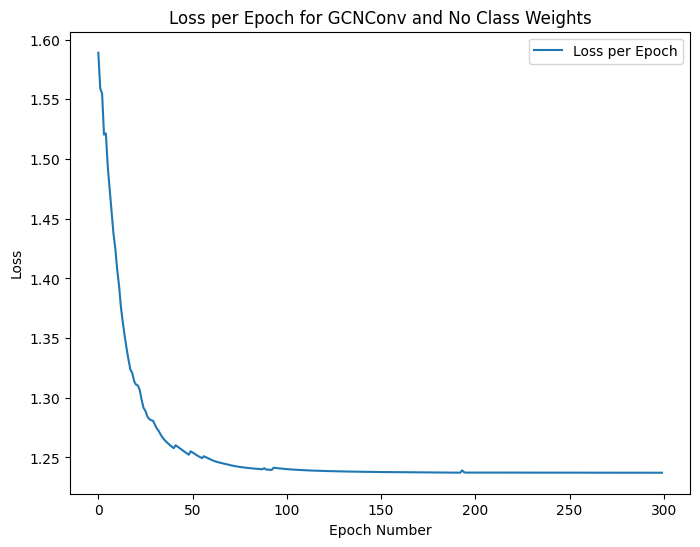

/home/mxg1065/.local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


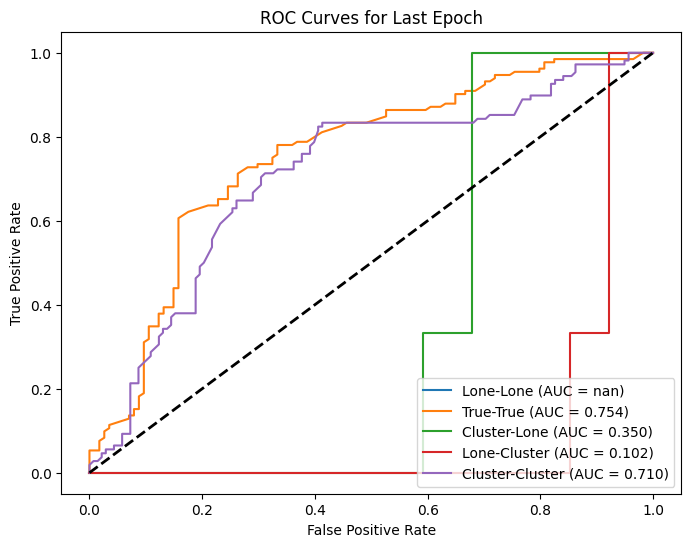

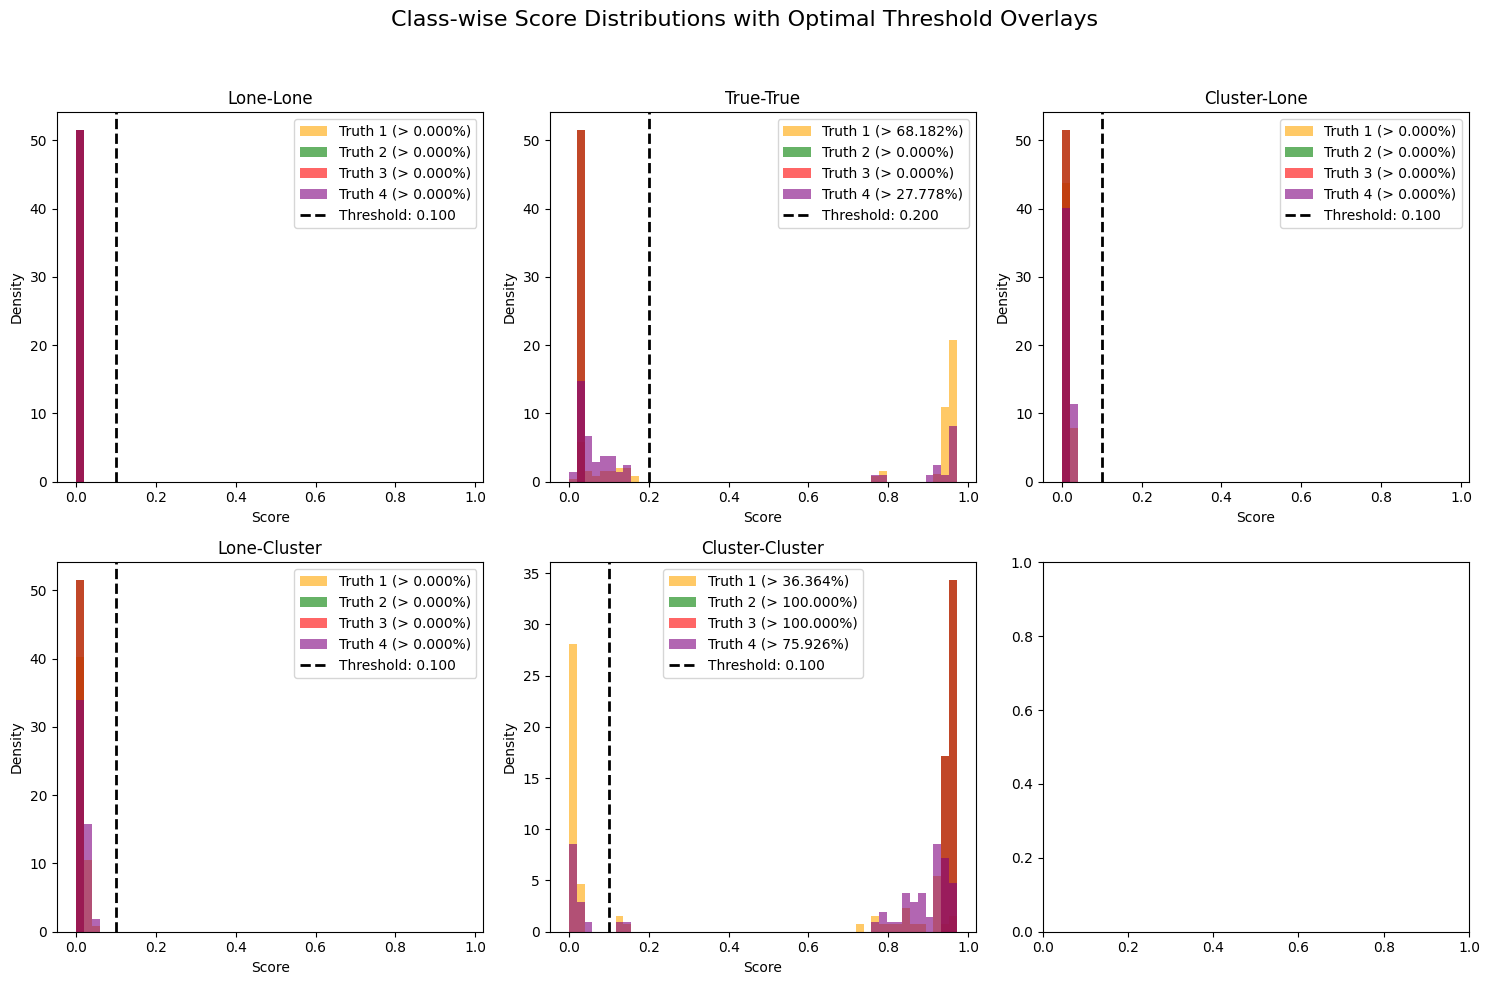

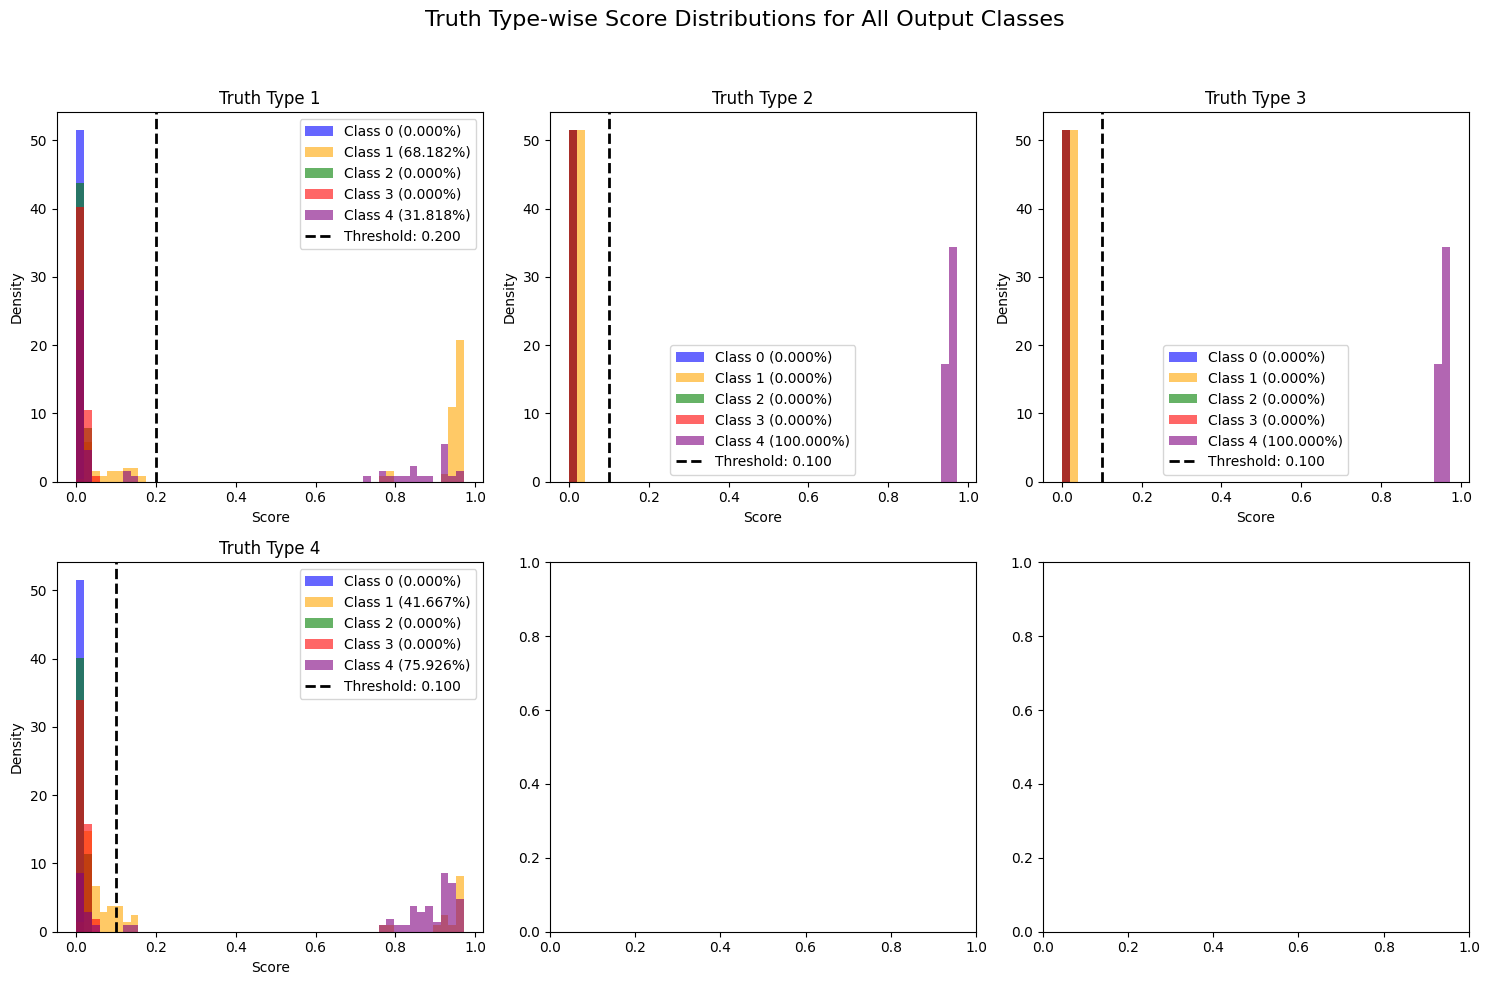

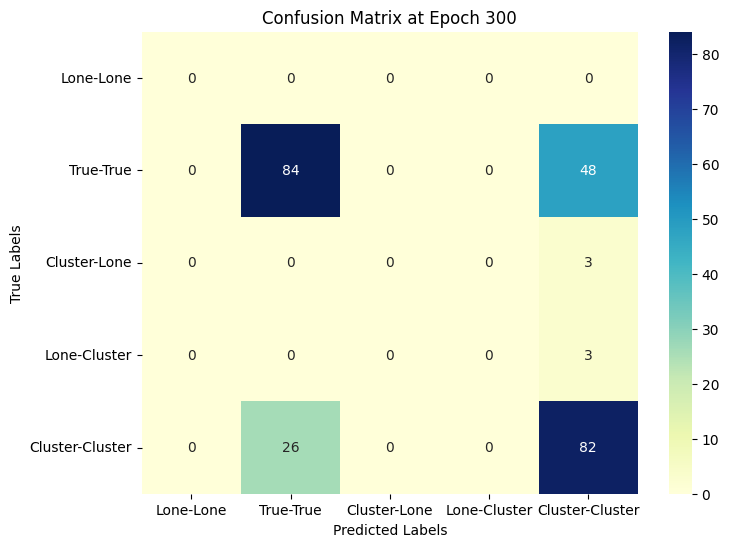

In [68]:
plot_loss_curves()
plot_roc_curves()
plot_class_wise_distributions(scores[-1], truth_labels[-1], class_names, optimal_thresholds, common_bins, colors)
plot_truth_type_distributions(scores[-1], truth_labels[-1], class_names, optimal_thresholds, common_bins, colors)
plot_confusion_matrix(scores[-1], truth_labels[-1], class_names, class_thresholds, len(scores))